<a href="https://colab.research.google.com/github/KuriharaYoshiki/python_medical_images/blob/master/popipa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pythonを使って画像処理の基本を理解する

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###3.1 ピクセルから始める

3.1.1

<class 'numpy.ndarray'>


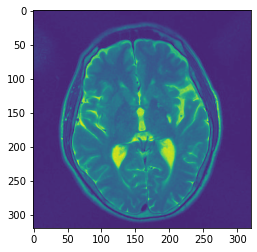

In [2]:
import cv2 #opencvをインポートする
import matplotlib.pyplot as plt #画像を表示するためにmatplotlibを使用する

#サンプル画像のMR_LEE_IR87a.jpgを利用
image=cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/MR_LEE_IR87a.jpg',
                 flags=cv2.IMREAD_GRAYSCALE)
#画像を表示
plt.imshow(image)

print(type(image))

3.1.2

In [3]:
'''
リスト3.1.1のimage変数を引き続き利用する。
ピクセル位置を指定する。
例えば、x=100,y=100のピクセル値。
ただし、画像の座標は[0]から数えることに注意する。(マイナス1する)
'''
x=100
y=100
pixVal=image[x-1,y-1]
print(pixVal) #ピクセルを出力して確かめる。

70


3.1.3

In [4]:
#続き
#マトリクスサイズの確認
height,width=image.shape
#height,width,channels=image.shape #カラー画像の場合は受け手の変数が若干異なるので注意
print(width,height,'マトリクスサイズ(幅,高さ)')
print(type(image.shape))

320 320 マトリクスサイズ(幅,高さ)
<class 'tuple'>


###3.2 画像の標本化と量子化

3.2.1


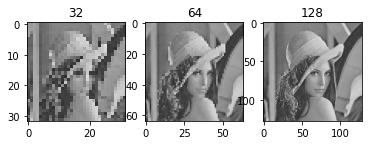

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#サンプル画像としてlena-gray.pngを利用する
lena=cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-gray.png')
resamples=[]
resamples.append(cv2.resize(lena,(32,32)))  #マトリクスサイズを変更する
resamples.append(cv2.resize(lena,(64,64)))
resamples.append(cv2.resize(lena,(128,128)))

for i in range(3):   #0,1,2
  plt.subplot(1,3,(1+i))  #領域を選択
  plt.title(str(2**(4+i+1)))  #タイトル
  plt.imshow(resamples[i],cmap="gray")
plt.show()

3.2.2


左から基準, FOV狭い,FOV広い


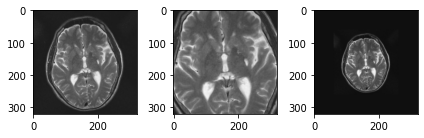

In [6]:
#基準画像(オリジナル)をロード
ref_img=cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/MR_LEE_IR87a.jpg',
                   flags=cv2.IMREAD_GRAYSCALE)
h,w=ref_img.shape

#FOV狭い画像を模擬作成
#中央の200×200をクロップ
narrow=ref_img[59:259,59:259]
#マトリクスサイズをオリジナルに合わせる
narrow=cv2.resize(narrow,(w,h))

#FOVの広い画像を模擬作成
#オリジナルの左上隅の領域10×10の平均ピクセル値でバディングする
pad_v=ref_img[:10,:10] #オリジナルの左上隅の領域10×10
mean=np.uint8(np.mean(pad_v)) #平均ピクセル値
wide=np.zeros((512,512)) #320*320 to 512*512
#周囲をバディング
wide[:96,:]=mean  #[ : ]の場合は0番目から最後までを取る
wide[416:512,:]=mean
wide[:,:96]=mean
wide[:,416:512]=mean
#中心の320×320を元画像で埋める
wide[96:416,96:416]=np.copy(ref_img)
#マトリクスサイズをオリジナルに合わせる
wide=cv2.resize(wide,(w,h))
#画像をリストにまとめる
images=[ref_img,narrow,wide]
print("左から基準, FOV狭い,FOV広い")
for i in range(3):
  plt.subplot(1,3,(1+i))
  plt.imshow(images[i],cmap='gray')
  plt.tight_layout() #重なりや空白を自動調整する

Memo  
有効視野の大きさはピクセルの大きさで決まる
ピクセルの大きさは格子間距離で決まる  
→ピクセルスペーシング  
標本化→量子化  
量子化：アナログ信号をデジタル信号に変換する

3.2.3


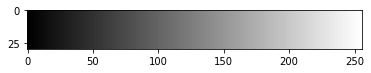

In [7]:
pixels=np.zeros((30,256))
for i in range(256):
  col=np.zeros(30)
  col=np.uint8(i)
  pixels[:,i]=col
  plt.imshow(pixels,cmap='gray')

3.2.4

In [8]:
print(np.iinfo(np.int8))  #signed Byte(8-bit)
#その他のレンジを調べる方法
print(np.iinfo(np.int16))  #signed Byte(16-bit)
print(np.iinfo(np.int32))  #signed Byte(32-bit)
print(np.iinfo(np.int64))  #signed Byte(64-bit)

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



3.2.5


In [9]:
num=np.uint8(0)  #type of unsigned byte(0 to 255)
print(num) #0
num255=np.uint8(255)
print(num255)  #255
overFlow=np.uint8(0-1) # -1にならず一周回って255に
print(overFlow)


0
255
255


###3.3 シングルチャンネル画像とマルチチャンネル画像

LUT:Look Up Table  
入力色データに対応する出力色データを参照する(Look Up)対応表(Table)

3.3.1

In [10]:
import cv2

#カラー画像をロード
bgr=cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-rgb.png',
               flags=cv2.IMREAD_UNCHANGED)
#BGRカラーをRGBに変換する
rgb=cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

#グレースケール画像をロード
gray=cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-gray.png',
                flags=cv2.IMREAD_UNCHANGED)

#カラーチャンネルを調べる
#ndarrayのshapeから調べる
#カラー画像の場合
height,width,channel=rgb.shape
print(height,width,channel)
#グレースケールの場合
height,width=gray.shape
print(height,width)

#ピクセル値から直接調べる
rgb100=rgb[100,100,:]  #[行の位置,列の位置,カラーチャンネル]
gray100=gray[100,100]  #[行の位置,列の位置]
#出力して確認
print("color pixel",rgb100)
print("8-bit gray pixel",gray100)

512 512 3
512 512
color pixel [178  68  78]
8-bit gray pixel 108


Memo  
画像処理の1つにカラー画像をグレースケールに変換する処理がある。  
→RGBの平均値などをRGB全ての要素に代入し直すことで表現できる。

3.3.22


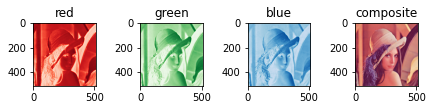

In [11]:
import matplotlib.pyplot as plt
import numpy as np

bgr=cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-rgb.png",
               cv2.IMREAD_UNCHANGED)
rgb=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

#RGB成分の分解
images=[]
r_channel=rgb[:,:,0]
g_channel=rgb[:,:,1]
b_channel=rgb[:,:,2]
images.append(r_channel)
images.append(g_channel)
images.append(b_channel)
#print(images)
#画像を表示して確かめる
for i in range(3):
  plt.subplot(1,4,(i+1))
  plt.tight_layout()
  if i==0:
    plt.title("red")
    plt.imshow(images[i],cmap="Reds")
  if i==1:
    plt.title("green")
    plt.imshow(images[i],cmap="Greens")
  if i==2:
    plt.title("blue")
    plt.imshow(images[i],cmap="Blues")
#元に戻す(合成)
#元に戻すにはRGB順にシングルチャンネルを持つ多次元配列を作ればよい
pixels=np.uint8(np.zeros((512,512,3)))
pixels[:,:,0]=r_channel
pixels[:,:,1]=g_channel
pixels[:,:,2]=b_channel
plt.subplot(1,4,4)
plt.title("composite")
plt.imshow(pixels)



3.3.2

In [0]:
bgr=cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-rgb.png",cv2.IMREAD_UNCHANGED)
rgb=cv2.cvtColor(bgr,cv2.COLOR_BGRGB) #BGRをRGBオーダーに変換

###3.4 画像のリサイズ


In [15]:
import cv2
#画像のロードとオリジナル画像サイズの確認
chest=cv2.imread('/content/drive/My Drive/DATASET/dataset/ChestXray.png',
                 cv2.IMREAD_GRAYSCALE)
print("オリジナルサイズ",chest.shape)
#リサイズ3000を256へ
chest256=cv2.resize(src=chest,dsize=(256,256),
                    interpolation=cv2.INTER_LINEAR)
print("ダウンサンプリング1",chest256.shape)
#係数でサイズを変更することもできる(1/10にする例)
img300=cv2.resize(chest,dsize=None,fx=0.1,fy=0.1,
      interpolation=cv2.INTER_LINEAR)
print("ダウンサンプリング2",img300.shape)


オリジナルサイズ (3000, 3000)
ダウンサンプリング1 (256, 256)
ダウンサンプリング2 (300, 300)


3.4.2

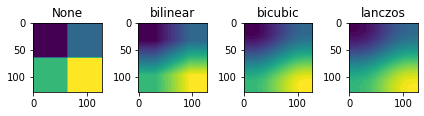

In [17]:
#OpenCVで利用可能なピクセル補間法を試す
import numpy as np
import matplotlib.pyplot as plt
#2*2ピクセル画像(8-bit)を作成
pix=np.zeros((2,2))
pix[0,0]=10
pix[0,1]=20
pix[1,0]=30
pix[1,1]=40
pix=np.uint8(pix) #8-bit化
#OpenCVで利用可能な補間法を利用して128×128にアップサンプリング(拡大)
#インターニアレスト(補間なし)
internearest=cv2.resize(src=pix,dsize=(128,128),
                        interpolation=cv2.INTER_NEAREST)
plt.subplot(1,4,1)
plt.title("None")
plt.imshow(internearest)
#バイリニア
linear=cv2.resize(src=pix,dsize=(128,128),
                  interpolation=cv2.INTER_LINEAR)
plt.subplot(1,4,2)
plt.title("bilinear")
plt.imshow(linear)
#バイキュービック
cubic=cv2.resize(src=pix,dsize=(128,128),
                  interpolation=cv2.INTER_CUBIC)
plt.subplot(1,4,3)
plt.title("bicubic")
plt.imshow(cubic)
#ランチョス
lanczos=cv2.resize(src=pix,dsize=(128,128),
                  interpolation=cv2.INTER_LANCZOS4)
                  #4という数字はSinc関数のすそ野の広がりの大きさ
plt.subplot(1,4,4)
plt.title("lanczos")
plt.imshow(lanczos)
plt.tight_layout()
plt.show()
